In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'
                     ,'number_project','time_spend_company'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=5e-3,
                 batch_size=1024,
                 n_epoch=50,
                 verbose=True,
                 n_bins_range=range(2,21),
                 n_init_bins_list=[10,15,20,25,30])

In [ ]:
%time clf_scores = exp.test_classification_performance(cv=3)

>>> Epoch = 1, Loss = 0.40256980061531067
[8, 5, 6, 2, 4]
>>> Epoch = 2, Loss = 0.3303510546684265
[8, 8, 6, 2, 4]
>>> Epoch = 3, Loss = 0.326318621635437
[8, 8, 7, 2, 4]
>>> Epoch = 4, Loss = 0.3242528438568115
[3, 8, 7, 2, 4]
>>> Epoch = 5, Loss = 0.32352694869041443
[3, 7, 7, 2, 4]
>>> Epoch = 6, Loss = 0.32449018955230713
[3, 7, 6, 2, 2]
0 5
>>> Epoch = 7, Loss = 0.32488813996315
[3, 7, 4, 2, 2]
0 5
>>> Epoch = 8, Loss = 0.319598525762558
[3, 8, 4, 2, 2]
0 5
>>> Epoch = 9, Loss = 0.317917138338089
[3, 8, 3, 2, 3]
0 5
>>> Epoch = 10, Loss = 0.3193318545818329
[3, 8, 4, 2, 3]
0 5
>>> Epoch = 11, Loss = 0.31641367077827454
[3, 8, 2, 2, 3]
0 5
>>> Epoch = 12, Loss = 0.3161611557006836
[3, 8, 2, 2, 3]
1 5
>>> Epoch = 13, Loss = 0.3181714713573456
[3, 7, 2, 2, 3]
0 5
>>> Epoch = 14, Loss = 0.31550464034080505
[3, 2, 2, 2, 3]
0 5
>>> Epoch = 15, Loss = 0.31400156021118164
[3, 2, 2, 2, 3]
1 5
>>> Epoch = 16, Loss = 0.31259885430336
[3, 2, 2, 2, 3]
2 5
>>> Epoch = 17, Loss = 0.3149694800376

[16, 13, 13, 2, 3]
0 5
>>> Epoch = 20, Loss = 0.1974078118801117
[14, 13, 13, 2, 4]
0 5
>>> Epoch = 21, Loss = 0.19501547515392303
[18, 15, 13, 2, 4]
0 5
>>> Epoch = 22, Loss = 0.19674988090991974
[15, 2, 13, 2, 4]
0 5
>>> Epoch = 23, Loss = 0.1966811716556549
[21, 2, 14, 2, 4]
0 5
>>> Epoch = 24, Loss = 0.19636058807373047
[15, 2, 11, 2, 4]
0 5
>>> Epoch = 25, Loss = 0.19589252769947052
[16, 2, 10, 2, 3]
0 5
>>> Epoch = 26, Loss = 0.1954488605260849
[2, 2, 10, 2, 3]
0 5
>>> Epoch = 27, Loss = 0.19618892669677734
[2, 2, 10, 2, 3]
1 5
>>> Epoch = 28, Loss = 0.19526688754558563
[2, 2, 10, 2, 3]
2 5
>>> Epoch = 29, Loss = 0.19490176439285278
[2, 2, 10, 2, 3]
3 5
>>> Epoch = 30, Loss = 0.19501543045043945
[2, 2, 8, 2, 3]
0 5
>>> Epoch = 31, Loss = 0.19424884021282196
[2, 2, 2, 2, 3]
0 5
>>> Epoch = 32, Loss = 0.1958913505077362
[2, 2, 2, 2, 3]
1 5
>>> Epoch = 33, Loss = 0.1937345713376999
[2, 3, 2, 2, 3]
0 5
>>> Epoch = 34, Loss = 0.1947876513004303
[2, 3, 7, 2, 3]
0 5
>>> Epoch = 35, Loss

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [ ]:
%time clustering_scores = exp.test_clustering_performance()

In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [10]:
# exp.semantic_binning.visualize_bin_embeddings()

In [7]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=30, lr=0.01, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.2681753933429718
[10, 9, 14, 3, 3]
>>> Epoch = 2, Loss = 0.26377061009407043
[10, 4, 10, 2, 3]
>>> Epoch = 3, Loss = 0.26171648502349854
[10, 4, 6, 2, 5]
>>> Epoch = 4, Loss = 0.2602560520172119
[3, 5, 4, 3, 5]
>>> Epoch = 5, Loss = 0.25998228788375854
[3, 2, 4, 2, 5]
>>> Epoch = 6, Loss = 0.2601519227027893
[4, 5, 4, 2, 5]
0 5
>>> Epoch = 7, Loss = 0.25949791073799133
[4, 5, 4, 2, 3]
0 5
>>> Epoch = 8, Loss = 0.2565867304801941
[4, 5, 4, 2, 3]
1 5
>>> Epoch = 9, Loss = 0.2571408748626709
[4, 5, 4, 2, 3]
2 5
>>> Epoch = 10, Loss = 0.25593268871307373
[4, 5, 6, 2, 3]
0 5
>>> Epoch = 11, Loss = 0.25514164566993713
[4, 5, 7, 2, 3]
0 5
>>> Epoch = 12, Loss = 0.25588858127593994
[4, 3, 7, 2, 5]
0 5
>>> Epoch = 13, Loss = 0.25293901562690735
[4, 3, 4, 2, 5]
0 5
>>> Epoch = 14, Loss = 0.25370171666145325
[4, 5, 4, 2, 3]
1 5
>>> Epoch = 15, Loss = 0.251443475484848
[4, 3, 6, 2, 3]
0 5
>>> Epoch = 16, Loss = 0.2559560537338257
[4, 3, 4, 2, 3]
0 5
>>> Epoch = 17, Loss = 0

In [20]:
sb.bins_by_var['satisfaction_level']['bins']

['(0.089, 0.14]', '(0.14, 0.317]', '(0.317, 0.45]', '(0.45, 1.0]']

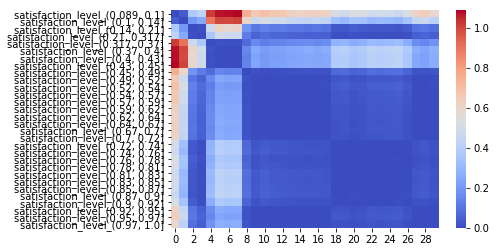

In [21]:
sb.plot_pairwise_distance_between_bins('satisfaction_level')

In [22]:
sb.bins_by_var['last_evaluation']['bins']

['(0.359, 0.45]',
 '(0.45, 0.48]',
 '(0.48, 0.51]',
 '(0.51, 0.52]',
 '(0.52, 0.57]',
 '(0.57, 0.76]',
 '(0.76, 0.97]',
 '(0.97, 0.99]',
 '(0.99, 1.0]']

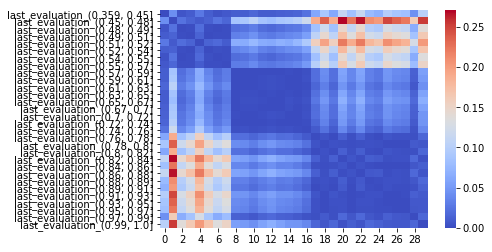

In [23]:
sb.plot_pairwise_distance_between_bins('last_evaluation')

In [24]:
sb.bins_by_var['average_montly_hours']['bins']

['(95.999, 126.0]',
 '(126.0, 162.0]',
 '(162.0, 243.0]',
 '(243.0, 282.0]',
 '(282.0, 310.0]']

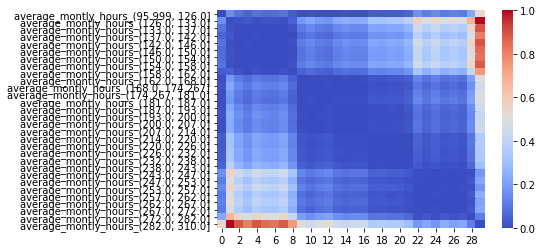

In [25]:
sb.plot_pairwise_distance_between_bins('average_montly_hours')

In [26]:
sb.bins_by_var['number_project']['bins']

['(1.999, 5.0]', '(5.0, 7.0]']

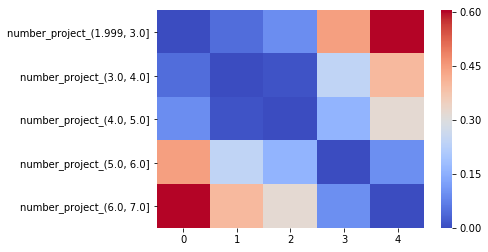

In [27]:
sb.plot_pairwise_distance_between_bins('number_project')

In [28]:
sb.bins_by_var['time_spend_company']['bins']

['(1.999, 3.0]', '(3.0, 6.0]', '(6.0, 10.0]']

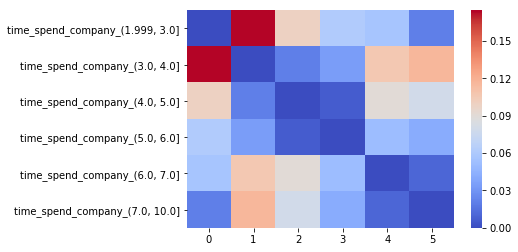

In [29]:
sb.plot_pairwise_distance_between_bins('time_spend_company')

In [ ]:
### 학습된 트리의 깊이, 형태 비교

In [ ]:
# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data, feature_names=X.columns, 
#                 impurity=False, proportion=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())